<a href="https://colab.research.google.com/github/cocoisland/DS-Sprint-02-Storytelling-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [4]:
print(df.shape)
print(df.isna().sum())


(2693, 6)
Year                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Guest                         0
Occupation                    0
dtype: int64


In [5]:
df.sample(5)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
2109,2012,Writer,1/25/12,Media,Paula Broadwell,Media
86,1999,actress,4/15/99,Acting,Marlee Matlin,"Acting, Comedy & Music"
2669,2015,nyc mayor,6/2/15,Politician,Bill de Blasio,Government and Politics
877,2004,american politician,2/4/04,Politician,Bob Dole,Government and Politics
118,1999,actress,6/30/99,Acting,Roseanne Barr,"Acting, Comedy & Music"


In [6]:
guest = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
guest

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

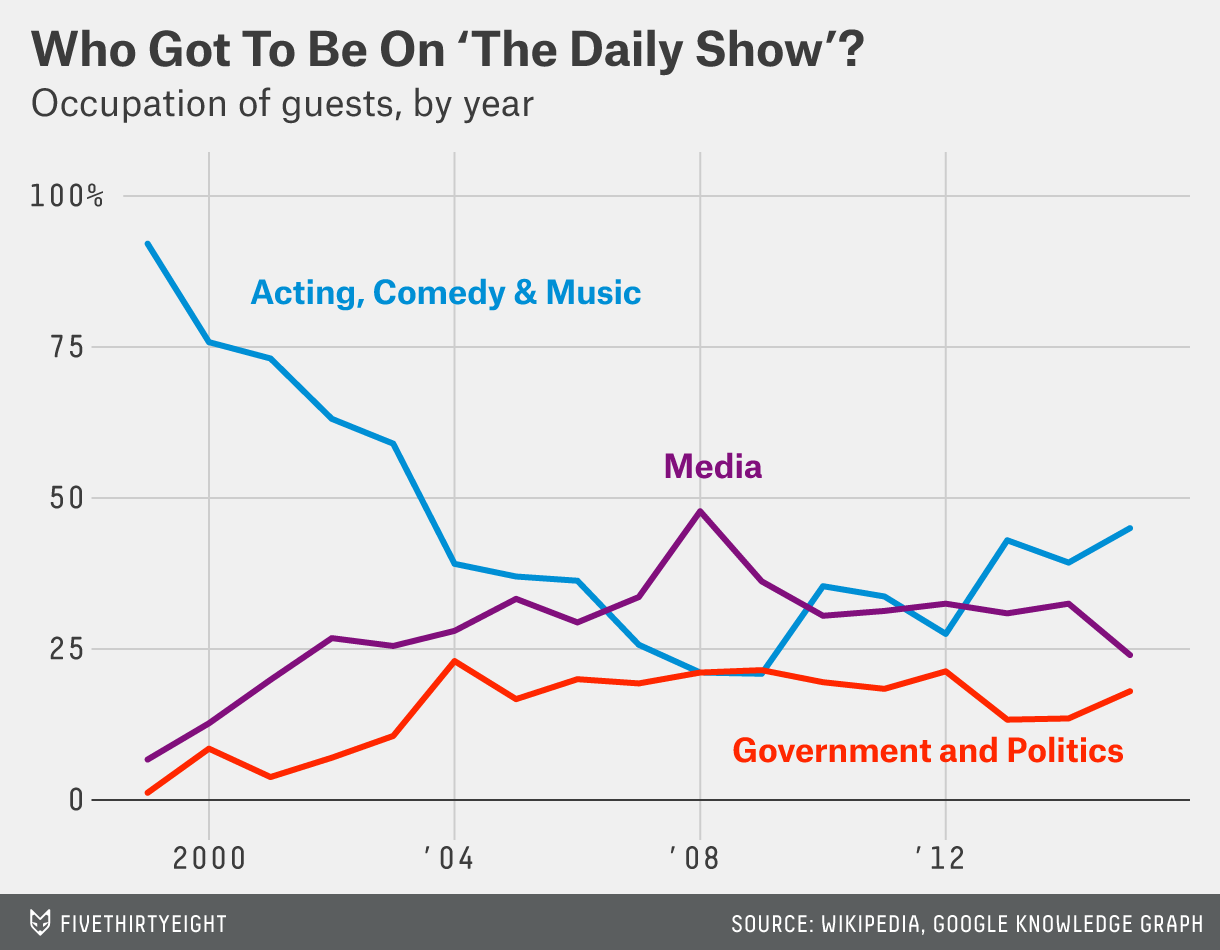

In [7]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [8]:
guest.head(1)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072


In [0]:
guest.drop(columns=['Other'], inplace=True)

In [0]:

guest = guest *100

In [11]:
guest.head(1)

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506


'import matplotlib.ticker as ticker\nimport matplotlib as mpl\n\nxlabels = [\'\', \'2000\',"\'04","\'08","\'12"]\n\n@ticker.FuncFormatter\ndef major_formatter(x, pos):\n  return xlabels[pos]\n  \nax.xaxis.set_major_formatter(major_formatter)\n  \n#ax.set_xticks([0,2000,2005,2010,2018])\nax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter(xlabels))\n'

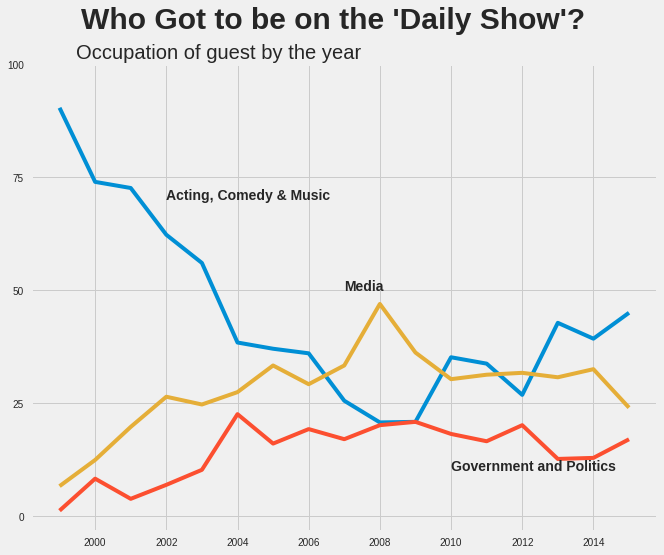

In [20]:

plt.style.use('fivethirtyeight') #no difference?

'''fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111)
ax.plot(guest)
'''


fig, ax = plt.subplots( figsize=(10,8))
fig.suptitle("Who Got to be on the 'Daily Show'?", fontsize=30, fontweight='bold')

ax.plot(guest)

ax.set_title("Occupation of guest by the year", x=0.3 )

ax.annotate(s="Acting, Comedy & Music", xytext=(2002, 70), xy=(2002,70),fontweight='bold')
ax.annotate(s="Media", xytext=(2007, 50), xy=(2007,50),fontweight='bold')
ax.annotate(s="Government and Politics", xytext=(2010, 10), xy=(2010,10),fontweight='bold')

ax.set(xlabel = '',
       ylabel = '',
       yticks = range(0, 101, 25))


#plt.xticks( ('', '2000',"'04","'08","'12"))

'''import matplotlib.ticker as ticker
import matplotlib as mpl

xlabels = ['', '2000',"'04","'08","'12"]

@ticker.FuncFormatter
def major_formatter(x, pos):
  return xlabels[pos]
  
ax.xaxis.set_major_formatter(major_formatter)
  
#ax.set_xticks([0,2000,2005,2010,2018])
ax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter(xlabels))
'''




In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

label_lookup = {.25: 'Label 1',
                .5: 'Label 2',
                .75: 'Label 3'}

def mjrFormatter(x, pos):
    print (x, pos)
    return label_lookup[x]

ax = plt.gca()
ax.set_yticks([.25,.5,.75], minor=False)
ax.yaxis.set_major_formatter(mpl.ticker.FixedFormatter(['Label 1', 'Label 2', 'Label 3']))
plt.draw()
plt.show()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [12]:
df.sample()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
2367,2013,journalist,5/16/13,Media,George Packer,Media


In [0]:
ga= df['Guest'].value_counts()

In [0]:
top_ten=ga.head(10)

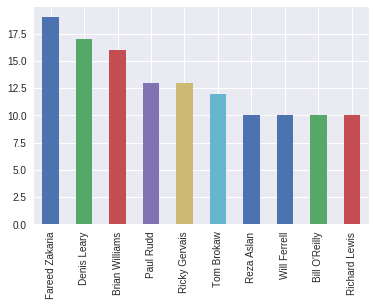

In [15]:
top_ten.plot.bar()